In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.cluster import KMeans

In [5]:
# reading the data and looking at the first five rows of the data
data=pd.read_csv("product_MHQ.csv")
data.head()

,ItemLookupcode,Product_Line,Item_description,G,Ke,Ko,N,O,"Condiments, Sauces and seasonings",Cookies and Crackers,Cooking and baking,Health and Protein bars,Savoury and Salty Snacks,Sweeteners,unique_customers,sales,units,sales_rank
0,85,Nutilight - No Sugar Added Sweet Nut Spreads,Hazelnut Spread with Cocoa,1,1,1,1,0,0,0,0,0,0,0,157,345996,45038,1
1,8259,Swerve - Ultimate Sugar Replacement,Icing Sugar,1,1,1,1,0,0,0,0,0,0,1,158,230867,30509,2
2,180,Swerve - Ultimate Sugar Replacement (Foodservi...,Bulk Icing Sugar Sweetener,1,1,1,1,0,0,0,0,0,0,1,71,225078,1590,3
3,8260,Swerve - Ultimate Sugar Replacement,Granular,1,1,1,1,0,0,0,0,0,0,1,150,222887,29600,4
4,8532,Joseph's Bakery,Pita,0,0,1,0,0,0,0,0,0,0,0,124,207795,70622,5


In [6]:
# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['G','Ke','Ko','N','O','Condiments, Sauces and seasonings','Cookies and Crackers ','Cooking and baking','Health and Protein bars ','Savoury and Salty Snacks','Sweeteners','unique_customers','sales','units','sales_rank']])

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,4.440000e+02,4.440000e+02,4.440000e+02,4.440000e+02,4.440000e+02,4.440000e+02,4.440000e+02,4.440000e+02,4.440000e+02,4.440000e+02,4.440000e+02,4.440000e+02,4.440000e+02,4.440000e+02,4.440000e+02
mean,4.180840e-16,5.306066e-16,1.320265e-16,1.213744e-15,8.051617e-17,-1.184988e-15,-1.043460e-15,9.851979e-17,1.555312e-16,-4.602174e-16,5.001005e-17,4.403385e-16,3.263156e-17,-1.362774e-17,-1.000201e-18
std,1.001128e+00,1.001128e+00,1.001128e+00,1.001128e+00,1.001128e+00,1.001128e+00,1.001128e+00,1.001128e+00,1.001128e+00,1.001128e+00,1.001128e+00,1.001128e+00,1.001128e+00,1.001128e+00,1.001128e+00
min,-3.053781e+00,-1.545740e+00,-9.559253e-01,-1.785687e+00,-5.182388e-01,-3.990851e-01,-2.879702e-01,-4.141304e-01,-2.228125e-01,-2.494012e-01,-3.876326e-01,-9.379527e-01,-4.480335e-01,-3.865598e-01,-1.728154e+00
25%,3.274629e-01,-1.545740e+00,-9.559253e-01,5.600085e-01,-5.182388e-01,-3.990851e-01,-2.879702e-01,-4.141304e-01,-2.228125e-01,-2.494012e-01,-3.876326e-01,-7.123563e-01,-4.300858e-01,-3.742448e-01,-8.640771e-01
50%,3.274629e-01,6.469392e-01,-9.559253e-01,5.600085e-01,-5.182388e-01,-3.990851e-01,-2.879702e-01,-4.141304e-01,-2.228125e-01,-2.494012e-01,-3.876326e-01,-3.457621e-01,-3.674418e-01,-3.226164e-01,0.000000e+00
75%,3.274629e-01,6.469392e-01,1.046107e+00,5.600085e-01,-5.182388e-01,-3.990851e-01,-2.879702e-01,-4.141304e-01,-2.228125e-01,-2.494012e-01,-3.876326e-01,3.592267e-01,-8.008913e-02,-9.076247e-02,8.640771e-01
max,3.274629e-01,6.469392e-01,1.046107e+00,5.600085e-01,1.929612e+00,2.505731e+00,3.472582e+00,2.414699e+00,4.488079e+00,4.009604e+00,2.579762e+00,4.307164e+00,8.587557e+00,1.076343e+01,1.728154e+00


In [10]:
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
kmeans.inertia_

5769.395693373338

Text(0, 0.5, 'Inertia')

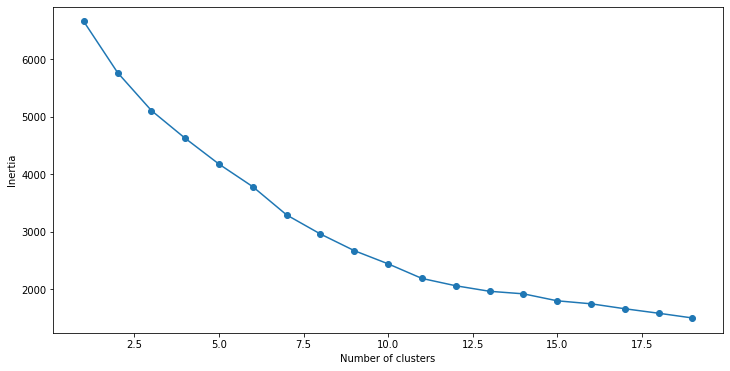

In [12]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [13]:
# k means using 7 clusters and k-means++ initialization
kmeans = KMeans(n_clusters =7, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [14]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 5, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 4, 5, 1, 4, 5, 4, 0, 4, 1, 5, 4,
       1, 1, 0, 1, 0, 4, 1, 4, 4, 3, 1, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 5,
       5, 4, 4, 4, 0, 4, 4, 4, 4, 0, 4, 2, 4, 4, 3, 4, 4, 0, 4, 0, 4, 4,
       2, 5, 5, 5, 0, 4, 3, 4, 5, 2, 5, 4, 4, 3, 4, 3, 4, 4, 2, 5, 0, 4,
       5, 4, 3, 3, 5, 4, 4, 4, 3, 3, 4, 0, 4, 4, 4, 5, 4, 0, 3, 4, 5, 5,
       4, 4, 4, 3, 2, 4, 4, 4, 4, 5, 6, 0, 5, 0, 3, 2, 6, 4, 4, 5, 2, 3,
       4, 3, 5, 4, 4, 6, 4, 4, 5, 3, 4, 0, 5, 5, 5, 4, 4, 4, 5, 4, 6, 4,
       4, 6, 4, 5, 3, 5, 5, 3, 4, 4, 4, 4, 6, 4, 3, 6, 5, 6, 4, 5, 0, 4,
       4, 6, 5, 0, 3, 4, 0, 5, 4, 4, 5, 3, 4, 4, 4, 3, 5, 3, 5, 4, 3, 4,
       6, 0, 4, 0, 4, 4, 0, 4, 5, 5, 5, 4, 0, 0, 4, 5, 4, 4, 3, 4, 4, 0,
       3, 0, 4, 5, 5, 0, 3, 3, 5, 4, 4, 4, 0, 3, 4, 4, 4, 0, 0, 4, 4, 3,
       4, 4, 4, 4, 0, 3, 4, 4, 3, 6, 0, 5, 3, 6, 5, 0, 6, 4, 5, 3, 0, 3,
       6, 0, 4, 3, 4, 6, 0, 6, 3, 4, 2, 4, 4, 4, 0,

In [15]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

4    143
3    105
0     59
5     54
1     37
2     25
6     21
Name: cluster, dtype: int64

In [16]:
data['cluster']=pred

In [17]:
data

,ItemLookupcode,Product_Line,Item_description,G,Ke,Ko,N,O,"Condiments, Sauces and seasonings",Cookies and Crackers,Cooking and baking,Health and Protein bars,Savoury and Salty Snacks,Sweeteners,unique_customers,sales,units,sales_rank,cluster
0,85,Nutilight - No Sugar Added Sweet Nut Spreads,Hazelnut Spread with Cocoa,1,1,1,1,0,0,0,0,0,0,0,157,345996,45038,1,1
1,8259,Swerve - Ultimate Sugar Replacement,Icing Sugar,1,1,1,1,0,0,0,0,0,0,1,158,230867,30509,2,1
2,180,Swerve - Ultimate Sugar Replacement (Foodservi...,Bulk Icing Sugar Sweetener,1,1,1,1,0,0,0,0,0,0,1,71,225078,1590,3,1
3,8260,Swerve - Ultimate Sugar Replacement,Granular,1,1,1,1,0,0,0,0,0,0,1,150,222887,29600,4,1
4,8532,Joseph's Bakery,Pita,0,0,1,0,0,0,0,0,0,0,0,124,207795,70622,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,477,Greeniche - Multivitamins,Men's Multivitamin,1,1,1,0,0,0,0,0,0,0,0,2,33,4,440,3
440,B009,Blowholes - Eco-Friendly Paper Straws (Individ...,"Thick Bubble Tea Straws - White, Individually ...",0,1,0,0,0,0,0,0,0,0,0,4,33,5,441,3
441,481,Greeniche - Other Natural Supplements,VegeSlim Synergistic Weight Managment Aid,1,1,1,0,0,0,0,0,0,0,0,1,24,1,442,3
442,6343,Snow Farms - Canadian-Grown Dried Fruit,Dried Cranberries with Pomegranate Flavour,1,0,1,1,0,0,0,0,0,0,0,2,17,13,443,4


In [18]:
data[data['cluster']==4]

,ItemLookupcode,Product_Line,Item_description,G,Ke,Ko,N,O,"Condiments, Sauces and seasonings",Cookies and Crackers,Cooking and baking,Health and Protein bars,Savoury and Salty Snacks,Sweeteners,unique_customers,sales,units,sales_rank,cluster
33,9608,PB2 - Powdered Peanut Butter,Large PB2 - Chocolate,1,0,1,1,0,0,0,0,0,0,0,73,65647,7774,34,4
36,2279,KZ Clean Eating - Paleo Friendly Breakfast Foods,Large Breakfast Cereal - Chocolate & Strawberry,1,1,0,1,0,0,0,0,0,0,0,45,59956,4653,37,4
38,8511,KZ Clean Eating - High Fibre Scandinavian Cris...,High Fibre Scandinavian Organic Crispbread - Chia,0,1,0,1,1,0,1,0,0,0,0,72,55634,7555,39,4
40,2704,GluteNull Bakery - Organic Bars in Clamshell C...,Organic Raw Coco D'Lish Bar,1,1,0,1,1,0,1,0,0,0,0,44,55432,8701,41,4
43,694,KZ Clean Eating - High Fibre Scandinavian Cris...,High Fibre Scandinavian Organic Crispbread,0,1,0,1,1,0,1,0,0,0,0,90,50549,6880,44,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,5187,Snow Farms - Organic Flax Oil,Small Organic Flax Seed Oil,1,1,1,1,1,0,0,0,0,0,0,4,162,37,398,4
403,6344,Snow Farms - Canadian-Grown Dried Fruit,Dried Cranberries with Raspberry Flavour,1,0,1,1,0,0,0,0,0,0,0,5,121,61,404,4
421,7152,Nature's Pasta - Egg Pasta with Nature's Farm'...,Free-Run Egg Pasta - Spinach Fettuccine,0,0,1,1,1,0,0,0,0,0,0,1,78,23,422,4
427,723,Snow Farms - Canadian-Grown Dried Fruit,Dried Cranberries with Orange Flavour,1,0,1,1,0,0,0,0,0,0,0,5,68,34,428,4
